In [1]:
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from common.benchmark import BenchmarkResult
from common.utils import *

from lab2.runners import *
from numpy import cos
from numpy import exp
from numpy import pi

ACC_Q = ("accuracy", "queries")

In [5]:
%load_ext autoreload
%autoreload 2

In [7]:
from common.functions import Basic

f = Basic(2)
TARGET = f.target()
PROBLEM = lambda: Oracle(f, TARGET)
runners = list(map(lambda r: r(PROBLEM(), Vector(3, 2)), RunnerMeta.runners))

b = BenchmarkResult.compare(runners)

--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner


In [8]:
b.top("accuracy")

sorted by accuracy
| name                |            accuracy |    queries |                time |
|---------------------+---------------------+------------+---------------------|
| NewtonSearchRunner  |          0.00016506 |        176 |          0.00230730 |
| NewtonConstRunner   |          0.00070711 |         24 |          0.00075830 |
| ScipyNewtonCGRunner |          0.00707107 |         18 |          0.00230470 |
| WolfeRunner         | 1000000000.00000000 | 1000000000 | 1000000000.00000000 |


In [9]:
# можно так

experiments = []
v = Vector(15, 15)
for i in range(2, 10):
    
    runners = [
        NewtonConstRunner(PROBLEM(), v, NewtonConstOptions(
            exit_condition_threshold= 10 ** (-i)
        )),
        NewtonSearchRunner(PROBLEM(), v, NewtonSearchOptions(
            exit_condition_threshold= 10 ** (-i)
        ))
    ]
    experiments.append(runners)
b = BenchmarkResult.series(experiments)

running experiment 1
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 2
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 3
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 4
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 5
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 6
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 7
--running NewtonConstRunner
--running NewtonSearchRunner
running experiment 8
--running NewtonConstRunner
--running NewtonSearchRunner


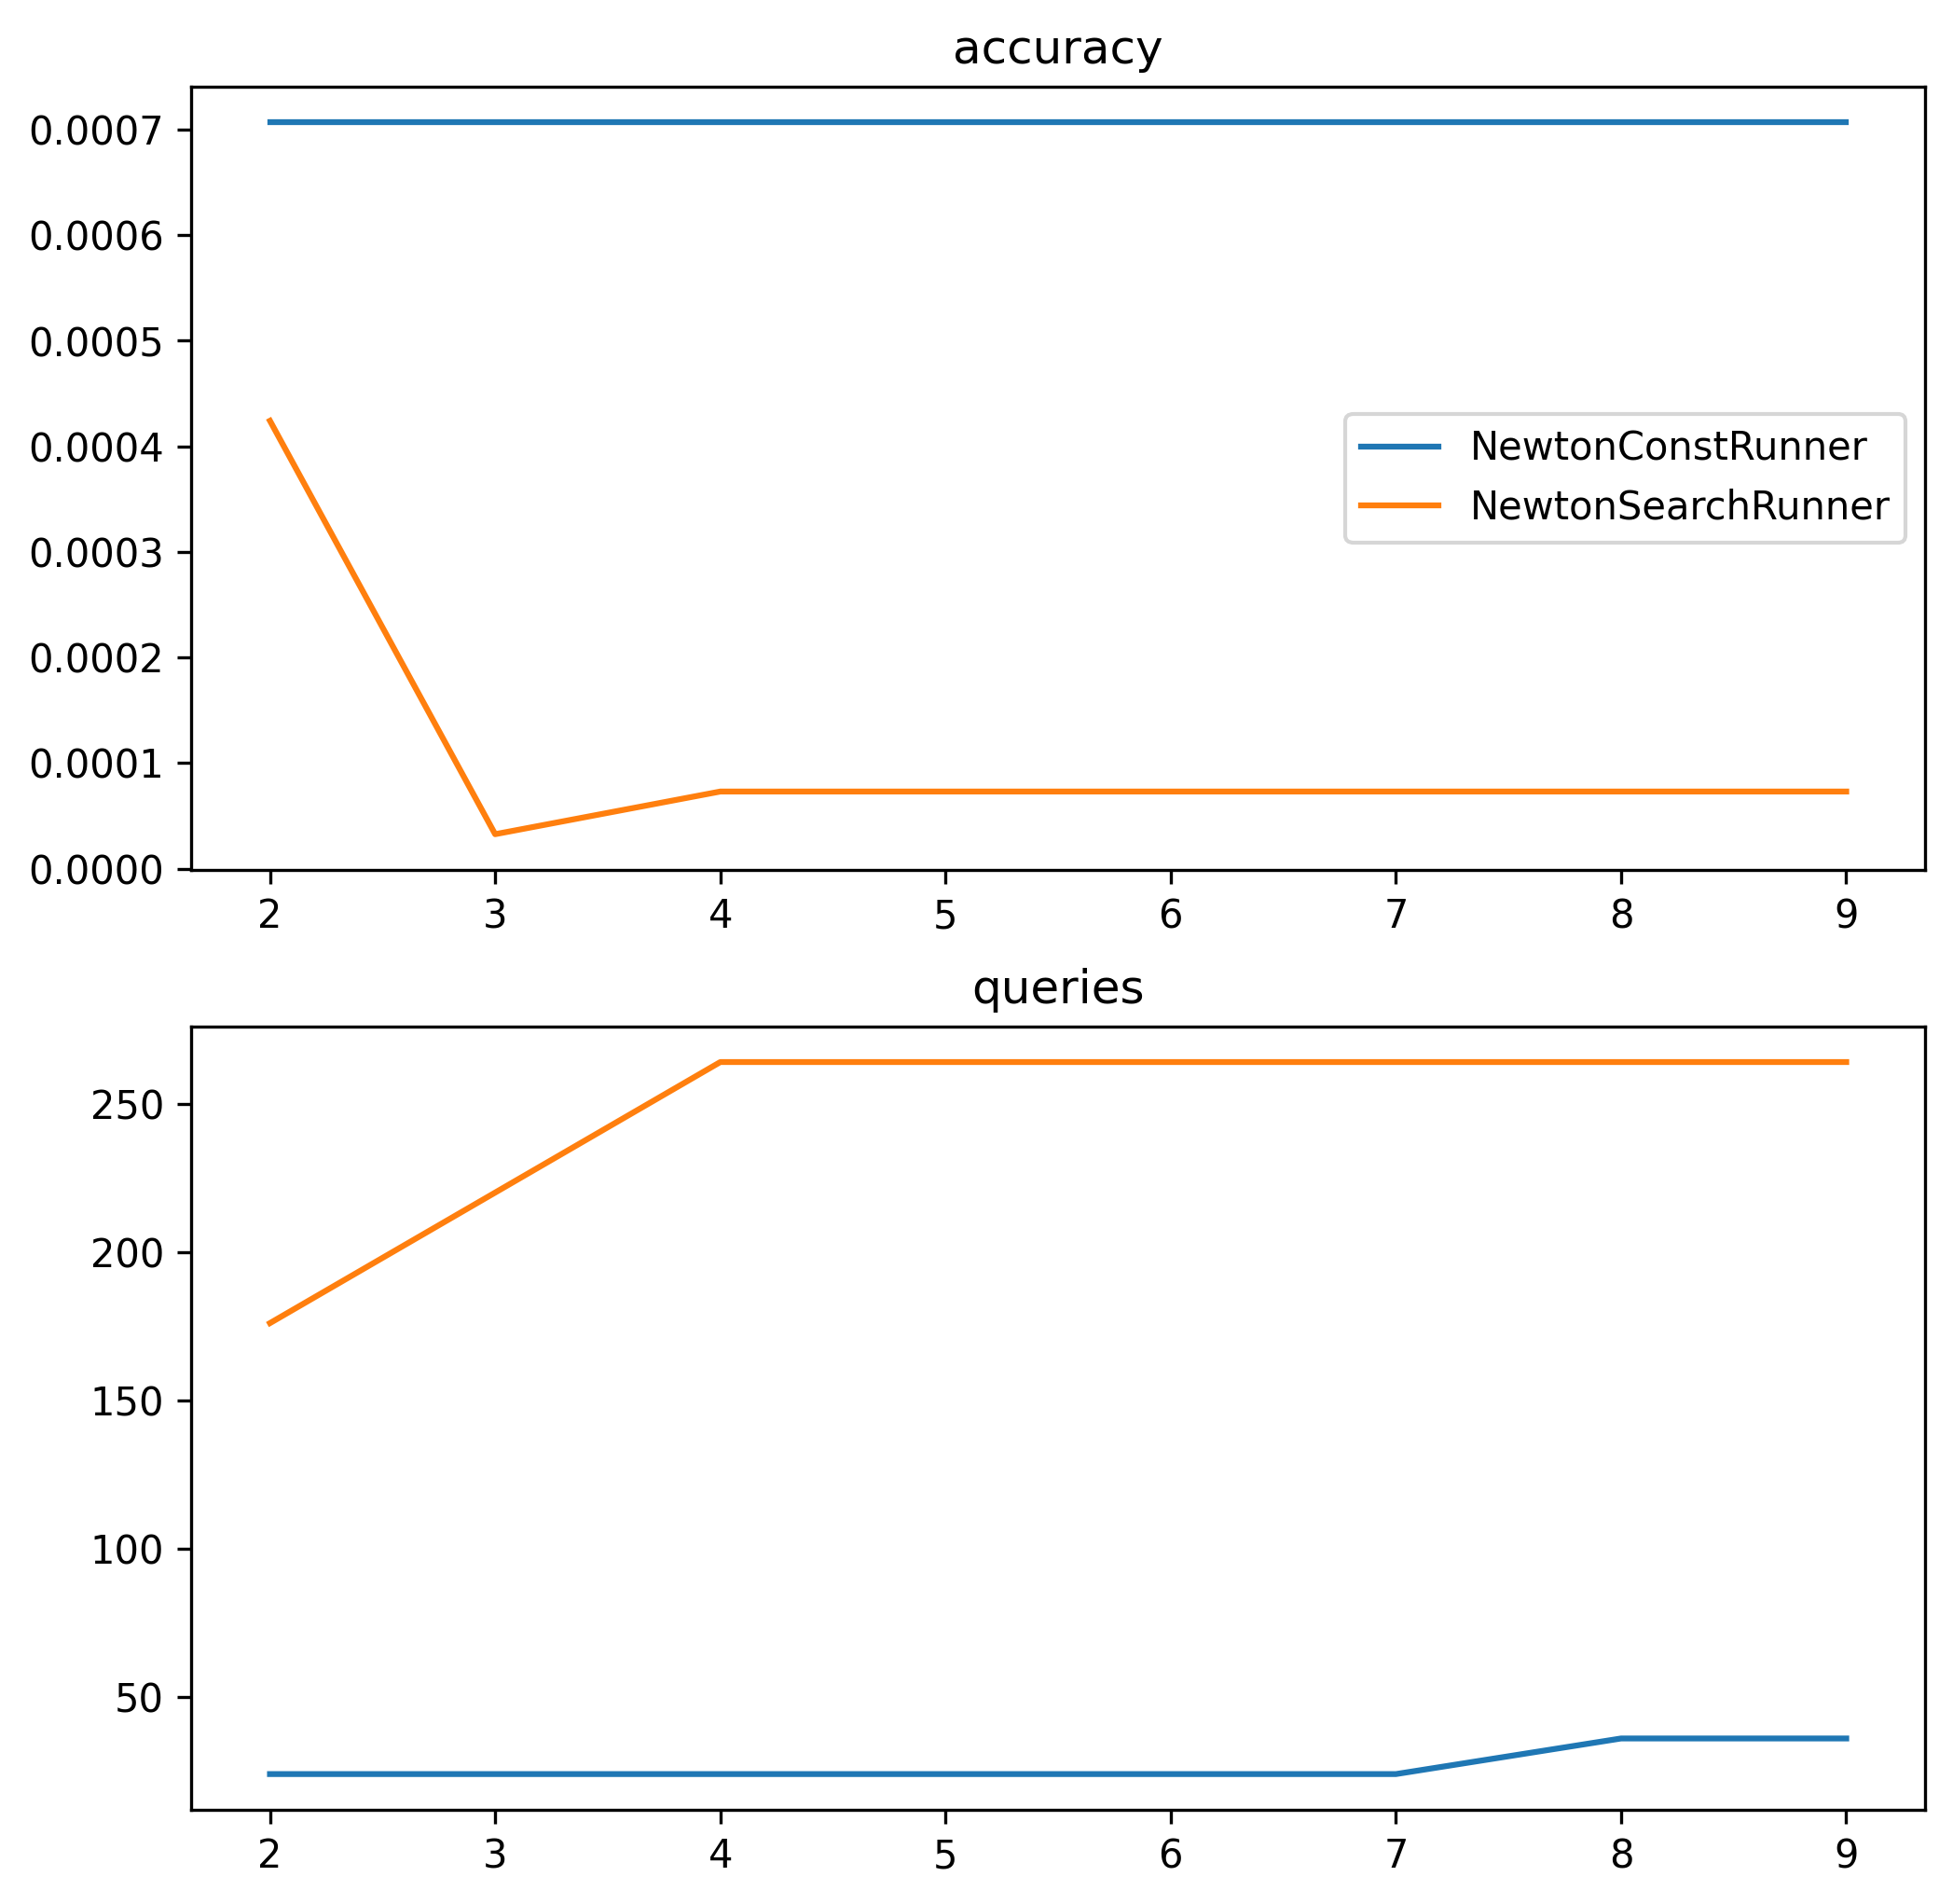

In [10]:
BenchmarkResult.plot_results(b, ACC_Q, list(map(str, range(2, 10))))

In [11]:
# или так
params = []
for i in range(2, 10):
    params.append(dict(
        o=PROBLEM(),
        start=Vector(15, 15),
        override_opts={
            'exit_condition_threshold': 10 ** (-i)
        }
    ))

b = BenchmarkResult.series(RunnerMeta.runners, params)


running experiment 1
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 2
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 3
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 4
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 5
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 6
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 7
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 8
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSea

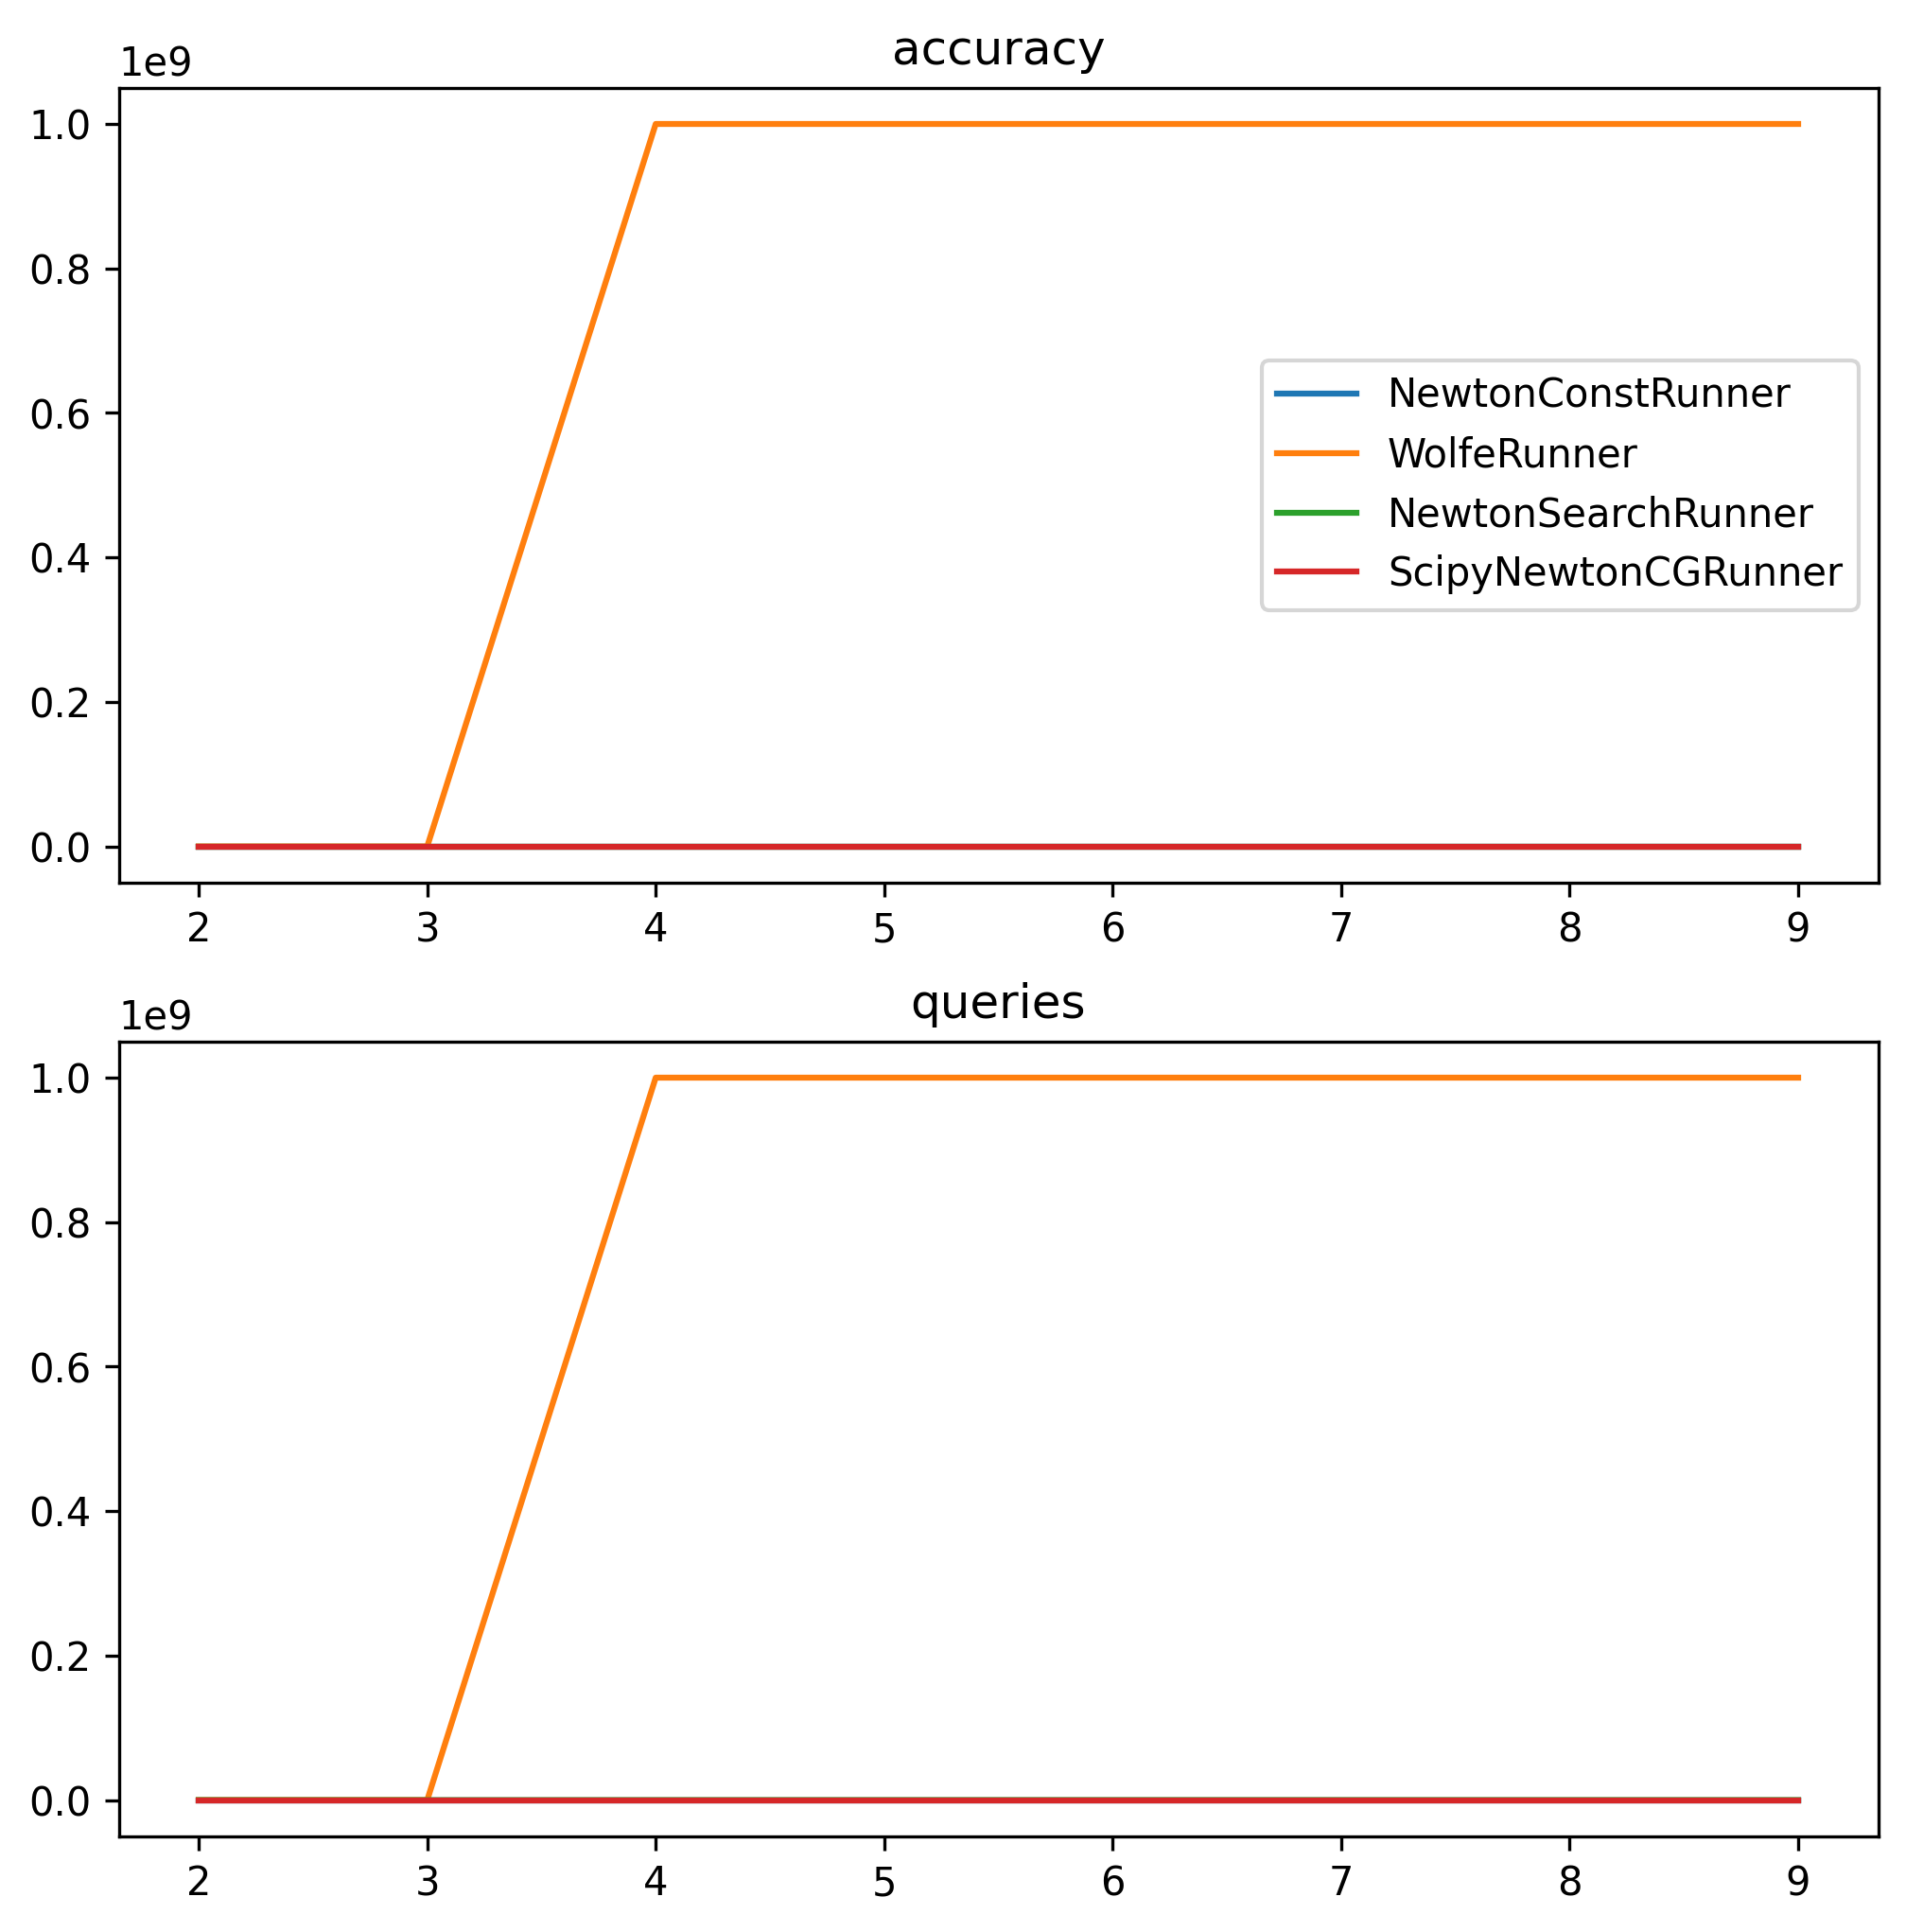

In [12]:
BenchmarkResult.plot_results(b, ACC_Q, list(map(str, range(2, 10))))

почему-то `WolfeRunner` перестает нормально работать, если указать точность меньше, чем 0.001

### Разные функции

In [14]:
from common.functions.functions import functions

params = []
for f in functions():
    params.append(dict(
        o=Oracle(f, f.target()),
        start=Vector(15, 15),
    ))

b = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 2
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 3
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 4
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 5
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 6
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner
running experiment 7
--running NewtonConstRunner
--running WolfeRunner
--running NewtonSearchRunner
--running ScipyNewtonCGRunner


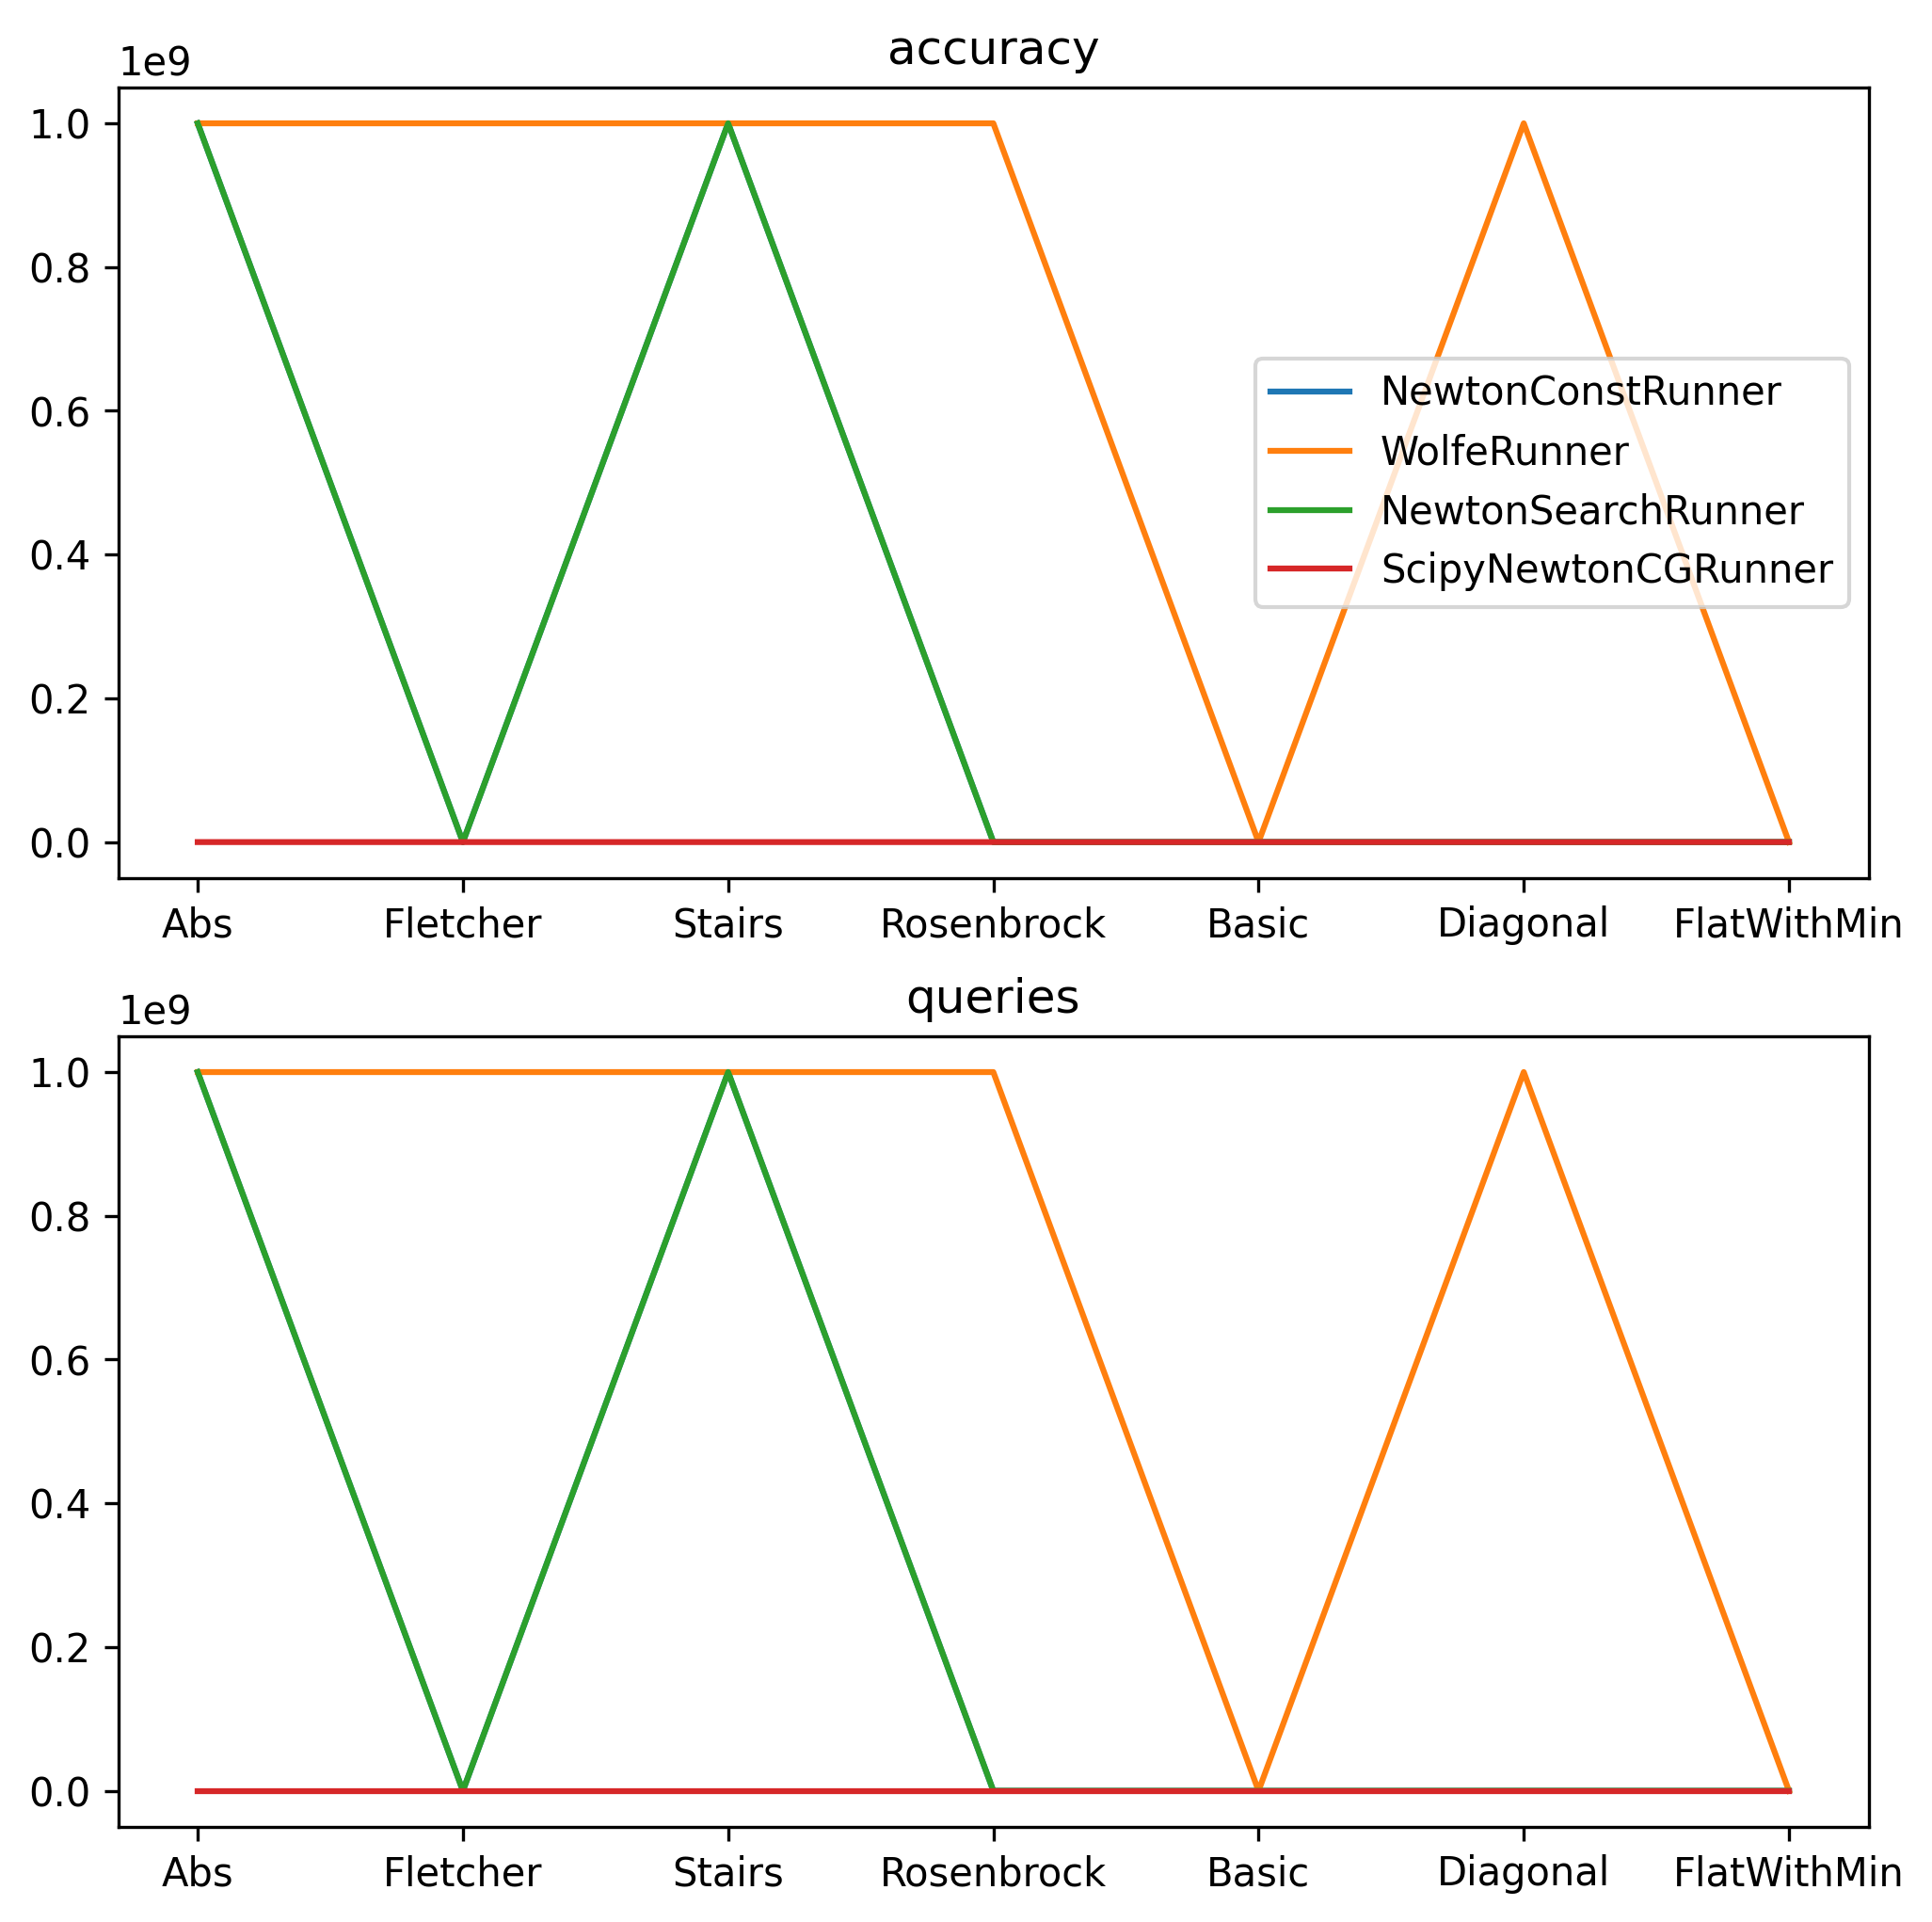

sorted by accuracy
| name                |            accuracy |    queries |                time |
|---------------------+---------------------+------------+---------------------|
| ScipyNewtonCGRunner |         21.22027568 |         38 |          0.00182910 |
| NewtonConstRunner   | 1000000000.00000000 | 1000000000 | 1000000000.00000000 |
| WolfeRunner         | 1000000000.00000000 | 1000000000 | 1000000000.00000000 |
| NewtonSearchRunner  | 1000000000.00000000 | 1000000000 | 1000000000.00000000 |

sorted by queries
| name                |            accuracy |    queries |                time |
|---------------------+---------------------+------------+---------------------|
| ScipyNewtonCGRunner |         21.22027568 |         38 |          0.00182910 |
| NewtonConstRunner   | 1000000000.00000000 | 1000000000 | 1000000000.00000000 |
| WolfeRunner         | 1000000000.00000000 | 1000000000 | 1000000000.00000000 |
| NewtonSearchRunner  | 1000000000.00000000 | 1000000000 | 1000000000.0

In [15]:
BenchmarkResult.plot_results(b, ("accuracy", "queries"), list(map(lambda f: f.__name__, functions())))
b[0].top("accuracy")

## Сравнение со старыми на квадратичных

## Графики функций


## Визуализация работы

## Сравнение наш Ньютон с их

## Старые с новыми + зависимости от метода вычисления производной

##  Вольфе визуализация

## Волфе сравнение


## Нютон хуесос на абс


## пример, где разные методы, из одной начальной точки, сходятся к разным точкам
минимума.
 
$$
\sin\left(x+y\right)+\frac{1}{x+y}+\left(x-y\right)^{2}\cdot\frac{1}{50}
$$

## Все со всеми